BMPC protocol! 

Elapsed : 0.12377309799194336
Elapsed : 2.6627819538116455
Elapsed : 8.652359008789062
Elapsed : 23.030948877334595
Elapsed : 49.88750600814819
Elapsed : 94.61974096298218
Elapsed : 146.67797827720642

 CMPC protocol! 

Elapsed : 0.5559749603271484
Elapsed : 8.406564235687256
Elapsed : 28.372809886932373
Elapsed : 75.8038010597229
Elapsed : 155.61303091049194
Elapsed : 286.7333393096924
Elapsed : 526.5859410762787

 OLR protocol!
Elapsed : 1.7154271602630615
Elapsed : 7.579665184020996
Elapsed : 16.036017894744873
Elapsed : 31.397584915161133
Elapsed : 50.908214807510376
Elapsed : 79.78879690170288
Elapsed : 117.0915138721466


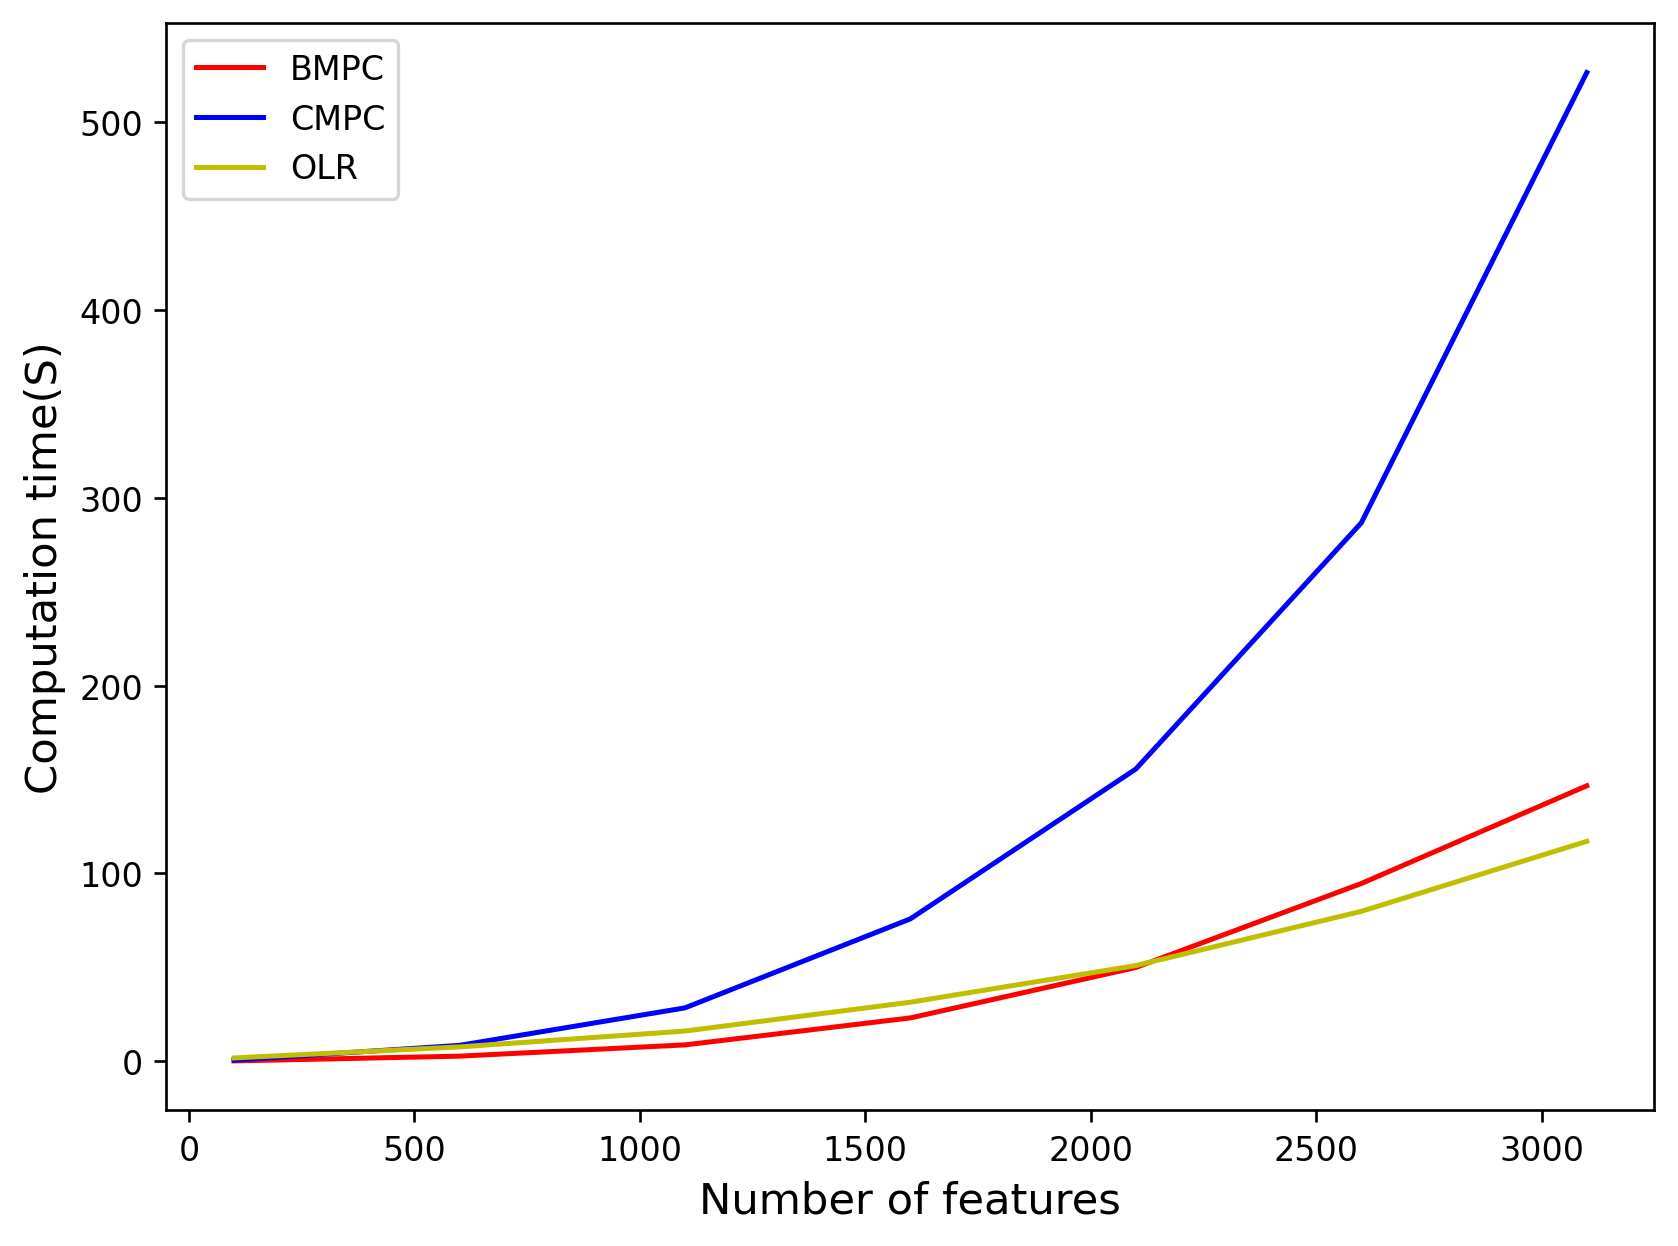

In [3]:
import sys
import numpy as np
import concurrent.futures
import queue
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)
np.warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
from matplotlib.pyplot import figure



def PPLRB(i,j):
    
    ###################################################################################
    def share(input, seed):
        np.random.seed(seed)
        x = 0.0000001 * np.random.random((np.shape(input)))
        y = input - x
        return x, y

    def sharey(input):
        rs4 = np.random.RandomState(24)
        a = rs4.randint(0, 2, np.shape(input))

        b = input - a

        return a, b

    ###################################################################################

    sizex = i
    sizey = j

    rs12 = np.random.RandomState(1)
    XA = np.round(rs12.uniform(-1, 1, (sizex, sizey)), 7)
    XA1, XA2 = share(XA, 4)

    rs13 = np.random.RandomState(2)
    YA = rs13.randint(0, 2, (sizex, 1))
    YA1, YA2 = sharey(YA)


    #     rs14 = np.random.RandomState(3)
    #     XB = np.round(rs14.uniform(-1, 1, (sizex, sizey)), 7)
    #     XB1, XB2 = share(XB, 6)

    #     rs15 = np.random.RandomState(4)
    #     YB = rs15.randint(0, 2, (sizex, 1))
    #     YB1, YB2 = sharey(YB)


    X_train = XA
    #     np.concatenate((XA, XB), axis=0)
    y_train = YA
    #     np.concatenate((YA, YB), axis=0)

    X_train1, X_train2 = share(X_train, 1)
    y_train1, y_train2 = sharey(y_train)

    ##############################################

    x = sizex
    y = sizey

    rs0 = np.random.RandomState(12)
    U = 0.0000001 * np.round(rs0.uniform(-1, 1, (y, x)), 5)

    rs1 = np.random.RandomState(12)
    V = 0.0000001 * np.round(rs1.uniform(-1, 1, (x, y)), 5)

    W = U.dot(V)

    U1, U2 = share(U, 4)

    V1, V2 = share(V, 5)

    W1, W2 = share(W, 6)

    #############################################

    rs0 = np.random.RandomState(12)
    u = np.round(rs0.uniform(-1, 1, (y, y)), 5)

    rs1 = np.random.RandomState(13)
    v = np.round(rs1.uniform(-1, 1, (y, y)), 5)

    w = u.dot(v)

    u1, u2 = share(u, 3)

    v1, v2 = share(v, 4)

    w1, w2 = share(w, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    uu = np.round(rs0.uniform(-1, 1, (x, y)), 5)

    rs1 = np.random.RandomState(13)
    vv = np.round(rs1.uniform(-1, 1, (y, 1)), 5)

    ww = uu.dot(vv)

    uu1, uu2 = share(uu, 3)

    vv1, vv2 = share(vv, 4)

    ww1, ww2 = share(ww, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    uuu = np.round(rs0.uniform(-1, 1, (x, 1)), 5)

    rs1 = np.random.RandomState(13)
    vvv = np.round(rs1.uniform(-1, 1, (x, 1)), 5)

    www = uuu * vvv

    uuu1, uuu2 = share(uuu, 3)

    vvv1, vvv2 = share(vvv, 4)

    www1, www2 = share(www, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    uuuu = np.round(rs0.uniform(-1, 1, (y, x)), 5)

    rs1 = np.random.RandomState(13)
    vvvv = np.round(rs1.uniform(-1, 1, (x, 1)), 5)

    wwww = uuuu.dot(vvvv)

    uuuu1, uuuu2 = share(uuuu, 3)

    vvvv1, vvvv2 = share(vvvv, 4)

    wwww1, wwww2 = share(wwww, 5)

    ##############################################

    rs0 = np.random.RandomState(12)
    uuuuu = np.round(rs0.uniform(-1, 1, (y, y)), 5)

    rs1 = np.random.RandomState(13)
    vvvvv = np.round(rs1.uniform(-1, 1, (y, 1)), 5)

    wwwww = uuuuu.dot(vvvvv)

    uuuuu1, uuuuu2 = share(uuuuu, 3)

    vvvvv1, vvvvv2 = share(vvvvv, 4)

    wwwww1, wwwww2 = share(wwwww, 5)


    # 1111111111111111111111111111111##############################################

    def CP1(beta):
        def mul_matrix_full(first, second, U, V, W):

            D1 = first - U
            E1 = second - V

            q1.put(D1)
            q1.put(E1)

            D2 = q2.get()
            E2 = q2.get()

            D = D1 + D2
            E = E1 + E2

            Z = W + D.dot(V) + U.dot(E) + D.dot(E)

            return Z

        def mul_number(first, second, U, V, W):

            D1 = first - U
            E1 = second - V

            q1.put(D1)
            q1.put(E1)

            D2 = q2.get()
            E2 = q2.get()

            D = D1 + D2
            E = E1 + E2

            Z = W + D * V + U * E + D * E

            return Z

        X = X_train1
        y = y_train1

#         X = np.concatenate((XA1, XB1), axis=0)
#         y = np.concatenate((YA1, YB1), axis=0)

        R = mul_matrix_full(X.T, X, U1, V1, W1)

        c = 0.00000009
        q = np.size(R, 0)
        I = np.identity(q)
        Xs = c * I
        Ms = c * R

        for x in range(0, 22):
            Ms_Xs = mul_matrix_full(Xs, Ms, u1, v1, w1)
            mul_2 = 2 * Xs
            X_s_t = mul_2 - Ms_Xs

            Ms_Ms = mul_matrix_full(Ms, Ms, u1, v1, w1)
            Ms_2 = 2 * Ms
            M_s_t = Ms_2 - Ms_Ms

            Xs = X_s_t
            Ms = M_s_t

        Hessian_Invers_TEMP = X_s_t

        Hessian_Invers = -4 * Hessian_Invers_TEMP

        for i in range(0, 10):

            beta_old = beta

            XB = mul_matrix_full(X, beta_old, uu1, vv1, ww1) * 1 / 8

            ###################################################

            
            def Sig_5(XB):
            
                Ms1 = XB

                Ms2 = mul_number(XB, XB, uuu1, vvv1, www1)
                Ms3 = mul_number(Ms2, XB, uuu1, vvv1, www1)
                Ms4 = Ms3

                Ms5 = mul_number(XB, XB, uuu1, vvv1, www1)
                Ms6 = mul_number(Ms5, XB, uuu1, vvv1, www1)
                Ms7 = mul_number(Ms6, XB, uuu1, vvv1, www1)
                Ms8 = mul_number(Ms7, XB, uuu1, vvv1, www1)
                Ms9 = Ms8

                Sig = (1.53048 * Ms1) - (2.3533056 * Ms4) + (1.3511295 * Ms9)

                return Sig
            #####################################################

            
            def Sig_3(XB):
                
                Ms1 = XB

                Ms2 = mul_number(XB, XB, uuu1, vvv1, www1)
                Ms3 = mul_number(Ms2, XB, uuu1, vvv1, www1)

                Ms4 = Ms3

                Sig = (1.20096 * Ms1) - (0.81562 * Ms4)
                
                return Sig

            #####################################################

            
            def Sig_7(XB):
                
                Ms1 = XB

                Ms2 = mul_number(XB, XB, uuu1, vvv1, www1)
                Ms3 = mul_number(Ms2, XB, uuu1, vvv1, www1)

                Ms4 = Ms3

                Ms5 = mul_number(XB, XB, uuu1, vvv1, www1)
                Ms6 = mul_number(Ms5, XB, uuu1, vvv1, www1)
                Ms7 = mul_number(Ms6, XB, uuu1, vvv1, www1)
                Ms8 = mul_number(Ms7, XB, uuu1, vvv1, www1)

                Ms9 = Ms8

                Ms10 = mul_number(XB, XB, uuu1, vvv1, www1)
                Ms11 = mul_number(Ms10, XB, uuu1, vvv1, www1)
                Ms12 = mul_number(Ms11, XB, uuu1, vvv1, www1)
                Ms13 = mul_number(Ms12, XB, uuu1, vvv1, www1)
                Ms14 = mul_number(Ms13, XB, uuu1, vvv1, www1)
                Ms15 = mul_number(Ms14, XB, uuu1, vvv1, www1)

                Ms16 = Ms15

                Sig = (1.73496 * Ms1) - (4.19407 * Ms4) + (5.43402 * Ms9) - (2.50739 * Ms16)

                return Sig
            
            #####################################################

            grad_temp = y - Sig_7(XB)

            Gradient = mul_matrix_full(X.T, grad_temp, uuuu1, vvvv1, wwww1)

            step = mul_matrix_full(Hessian_Invers, Gradient, uuuuu1, vvvvv1, wwwww1)

            beta = beta_old - step

        return beta


    # 2222222222222222222222222222222#####################################################
    def CP2(beta):
        def mul_matrix_full(first, second, U, V, W):

            D2 = first - U
            E2 = second - V

            q2.put(D2)
            q2.put(E2)

            D1 = q1.get()
            E1 = q1.get()

            D = D1 + D2
            E = E1 + E2

            Z = W + D.dot(V) + U.dot(E)

            return Z

        def mul_number(first, second, U, V, W):

            D2 = first - U
            E2 = second - V

            q2.put(D2)
            q2.put(E2)

            D1 = q1.get()
            E1 = q1.get()

            D = D1 + D2
            E = E1 + E2

            Z = W + D * V + U * E

            return Z

        X = X_train2
        y = y_train2

#         X = np.concatenate((XA2, XB2), axis=0)
#         y = np.concatenate((YA2, YB2), axis=0)

        R = mul_matrix_full(X.T, X, U2, V2, W2)

        c = 0.00000009
        q = np.size(R, 0)
        I = np.identity(q)
        Xs = c * I
        Ms = c * R

        for x in range(0, 22):
            Ms_Xs = mul_matrix_full(Xs, Ms, u2, v2, w2)
            mul_2 = 2 * Xs
            X_s_t = mul_2 - Ms_Xs
            Ms_Ms = mul_matrix_full(Ms, Ms, u2, v2, w2)
            Ms_2 = 2 * Ms
            M_s_t = Ms_2 - Ms_Ms

            Xs = X_s_t
            Ms = M_s_t

        Hessian_Invers_TEMP = X_s_t

        Hessian_Invers = -4 * Hessian_Invers_TEMP

        for i in range(0, 10):
            beta_old = beta

            XB = mul_matrix_full(X, beta_old, uu2, vv2, ww2) * 1 / 8

            #####################################################

                
            def Sig_5(XB):
                
                Ms1 = XB

                Ms2 = mul_number(XB, XB, uuu2, vvv2, www2)
                Ms3 = mul_number(Ms2, XB, uuu2, vvv2, www2)

                Ms4 = Ms3

                Ms5 = mul_number(XB, XB, uuu2, vvv2, www2)
                Ms6 = mul_number(Ms5, XB, uuu2, vvv2, www2)
                Ms7 = mul_number(Ms6, XB, uuu2, vvv2, www2)
                Ms8 = mul_number(Ms7, XB, uuu2, vvv2, www2)

                Ms9 = Ms8

                Sig = 1/2 + (1.53048 * Ms1) - (2.3533056 * Ms4) + (1.3511295 * Ms9)
                
                return Sig

            #####################################################

            def Sig_3(XB):
                
                Ms1 = XB

                Ms2 = mul_number(XB, XB, uuu2, vvv2, www2)
                Ms3 = mul_number(Ms2, XB, uuu2, vvv2, www2)
                Ms4 =  Ms3

                Sig = 1/2 + (1.20096 * Ms1) -  (0.81562 * Ms4)
                
                return Sig

            #####################################################

            def Sig_7(XB):    
            
                Ms1 = XB

                Ms2 = mul_number(XB, XB, uuu2, vvv2, www2)
                Ms3 = mul_number(Ms2, XB, uuu2, vvv2, www2)

                Ms4 = Ms3

                Ms5 = mul_number(XB, XB, uuu2, vvv2, www2)
                Ms6 = mul_number(Ms5, XB, uuu2, vvv2, www2)
                Ms7 = mul_number(Ms6, XB, uuu2, vvv2, www2)
                Ms8 = mul_number(Ms7, XB, uuu2, vvv2, www2)

                Ms9 = Ms8

                Ms10 = mul_number(XB, XB, uuu2, vvv2, www2)
                Ms11 = mul_number(Ms10, XB, uuu2, vvv2, www2)
                Ms12 = mul_number(Ms11, XB, uuu2, vvv2, www2)
                Ms13 = mul_number(Ms12, XB, uuu2, vvv2, www2)
                Ms14 = mul_number(Ms13, XB, uuu2, vvv2, www2)
                Ms15 = mul_number(Ms14, XB, uuu2, vvv2, www2)

                Ms16 = Ms15

                Sig = 1 / 2 + (1.73496 * Ms1) - (4.19407 * Ms4) + (5.43402 * Ms9) - (2.50739 * Ms16)
                
                return Sig

            #####################################################

            grad_temp = y - Sig_7(XB)

            Gradient = mul_matrix_full(X.T, grad_temp, uuuu2, vvvv2, wwww2)

            step = mul_matrix_full(Hessian_Invers, Gradient, uuuuu2, vvvvv2, wwwww2)

            beta = beta_old - step

        return beta

    ###################################################################################

    q1 = queue.Queue()
    q2 = queue.Queue()

    import atexit
    from time import time, strftime, localtime
    from datetime import timedelta

    def secondsToStr(elapsed=None):
        if elapsed is None:
            return strftime("%Y-%m-%d %H:%M:%S", localtime())
        else:
            return str(timedelta(seconds=elapsed))

    def SPDZ():

#         beta = np.zeros((np.size(XA + XB, 1), 1))

        beta_old, beta = np.zeros((np.size(X_train, 1), 1)), np.zeros((np.size(X_train, 1), 1))

        beta1, beta2 = share(beta, 21)
        with concurrent.futures.ThreadPoolExecutor() as executor:
            f1 = executor.submit(CP1, beta1)
            f2 = executor.submit(CP2, beta2)

            result = (f1.result() + f2.result())

            #         print('\n', f1.result(), '\n \n', f2.result(), '\n \n')

            return result

    start = time()
    result = SPDZ()
#     print(result)
    end = time()
    elapsed = end - start
    print('Elapsed :', end - start)
#     print('Record Number :', sizex)
#     print(result)
    return elapsed

    ###################################################################################

def PPLRC(i, j):

    import sys
    import numpy as np
    import concurrent.futures
    import queue
    import time

    np.set_printoptions(suppress=True)
    np.warnings.filterwarnings('ignore')
    np.set_printoptions(threshold=sys.maxsize)

    ###################################################################################

    def share(input):
        rs0 = np.random.RandomState(13)
        a = 0.0000001 * rs0.random((np.shape(input)))

        rs1 = np.random.RandomState(22)
        b = 0.0000001 * rs1.random((np.shape(input)))

        c = input - a - b

        return a, b, c

    def sharey(input):
        rs4 = np.random.RandomState(24)
        a = rs4.randint(0, 2, np.shape(input))

        rs5 = np.random.RandomState(45)
        b = rs5.randint(0, 2, np.shape(input))

        c = input - a - b

        return a, b, c

    ###################################################################################

    sizex = i
    sizey = j

    rs12 = np.random.RandomState(1)
    XA = np.round(rs12.uniform(-1, 1, (sizex, sizey)), 7)
#     XA1, XA2 = share(XA, 4)

    rs13 = np.random.RandomState(2)
    YA = rs13.randint(0, 2, (sizex, 1))
#     YA1, YA2 = sharey(YA)


    #     rs14 = np.random.RandomState(3)
    #     XB = np.round(rs14.uniform(-1, 1, (sizex, sizey)), 7)
    #     XB1, XB2 = share(XB, 6)

    #     rs15 = np.random.RandomState(4)
    #     YB = rs15.randint(0, 2, (sizex, 1))
    #     YB1, YB2 = sharey(YB)


    X_train = XA
    #     np.concatenate((XA, XB), axis=0)
    y_train = YA
    #     np.concatenate((YA, YB), axis=0)

    X_train1, X_train2, X_train3  = share(X_train)
    y_train1, y_train2, y_train3 = sharey(y_train)




    ###################################################################################


    def CP1(beta):
        def mul_multiply(first, second):

            r = rs5.uniform(0.0000000000001, 10 ** (-40), np.shape(first))
            j = rs5.uniform(0.0000000000001, 10 ** (-40), np.shape(second))

            q1.put(r)
            q1.put(j)

            k = q3.get()
            h = q3.get()

            A = first + r - k
            B = second + j - h

            q11.put(A)
            q11.put(B)

            C = q33.get()
            D = q33.get()

            W = np.multiply(A, B) + np.multiply(A, D) + np.multiply(C, B)
            return W

        def mul_multiply_number(first, second):

            # rs14 = np.random.RandomState(1)
            # r = rs14.uniform(0, 1, (np.shape(first)))
            # rs14 = np.random.RandomState(1)
            # j = rs14.uniform(0, 1, (np.shape(second)))
            np.random.seed(1)
            r = np.random.random((np.shape(first)))
            np.random.seed(1)
            j = np.random.uniform(0.01, 10 ** (-6), np.shape(second))

            q1.put(r)
            q1.put(j)

            k = q3.get()
            h = q3.get()

            A = first + r - k
            B = second + j - h

            q11.put(A)
            q11.put(B)

            C = q33.get()
            D = q33.get()

            W = (A * B) + (A * D) + (C * B)
            return W

        def mul_multiply_matrix_full(first, second):


            rs14 = np.random.RandomState(1)
            r = 0.0001 * rs14.random((np.shape(first)))
            rs14 = np.random.RandomState(1)
            j = 0.0001 *rs14.random((np.shape(second)))

            q1.put(r)
            q1.put(j)

            k = q3.get()
            h = q3.get()

            A = first + r - k
            B = second + j - h

            q11.put(A)
            q11.put(B)

            C = q33.get()
            D = q33.get()

            W = A.dot(B) + A.dot(D) + C.dot(B)

            return W

        X = X_train1
        y = y_train1
#         X = np.concatenate((XA1, XB1), axis=0)
#         y = np.concatenate((YA1, YB1), axis=0)

        # ///////////////////////////////////////Hessian///////////

        Hessian_temp = mul_multiply_matrix_full(X.T, X)

        # B = np.max(np.linalg.eigvals(Hessian_temp).real)
        #
        # c_0 = rs6.uniform(0.0000000000001, 10 ** (-40), (1, 1))
        # Xs = c_0 * 1 / 3
        # Ms = c_0 * B
        # # print(B)
        #
        #
        # for x in range(0, 20):
        #     Ms_Xs = mul_multiply(Xs, Ms)
        #     mul_2 = mul_multiply([[2 / 3]], Xs)
        #     X_s_t = mul_2 - Ms_Xs
        #
        #     Ms_Ms = mul_multiply(Ms, Ms)
        #     Ms_2 = mul_multiply([[2 / 3]], Ms)
        #     M_s_t = Ms_2 - Ms_Ms
        #
        #     Xs = X_s_t
        #     Ms = M_s_t

        Inve_eigen = [[0.00000002]]
        # print('\n',X_s_t)

        c = Inve_eigen
        q = np.size(Hessian_temp, 0)
        I = np.identity(q)
        Xs = mul_multiply(c, I / 3)
        Ms = mul_multiply(c, Hessian_temp)

        for x in range(0, 40):
            Ms_Xs = mul_multiply_matrix_full(Xs, Ms)
            mul_2 = mul_multiply([[2 / 3]], Xs)
            X_s_t = mul_2 - Ms_Xs

            Ms_Ms = mul_multiply_matrix_full(Ms, Ms)
            Ms_2 = mul_multiply([[2 / 3]], Ms)
            M_s_t = Ms_2 - Ms_Ms

            Xs = X_s_t
            Ms = M_s_t

        Hessian_Invers_TEMP = X_s_t

        Hessian_Invers = -4 * Hessian_Invers_TEMP

        # ///////////////////////////////////////Hessian///////////

        for i in range(0, 10):
            
            beta_old = beta

            XB = mul_multiply_matrix_full(X, beta_old) * 1 / 8

            ###################################################################################

            def Sig_5(XB):
            
                Ms1 = XB

                Ms2 = mul_multiply_number(XB, XB)
                Ms3 = mul_multiply_number(Ms2, XB)
                Ms4 = Ms3

                Ms5 = mul_multiply_number(XB, XB)
                Ms6 = mul_multiply_number(Ms5, XB)
                Ms7 = mul_multiply_number(Ms6, XB)
                Ms8 = mul_multiply_number(Ms7, XB)
                Ms9 = Ms8

                Sig = 1 / 2 + (1.53048 * Ms1) - (2.3533056 * Ms4) + (1.3511295 * Ms9)
                
                return Sig

            ####################################################################################

            def Sig_3(XB):
        
                Ms1 = XB

                Ms2 = mul_multiply_number(XB, XB)
                Ms3 = mul_multiply_number(Ms2, XB)
                Ms4 = Ms3

                Sig = 1/2 + (1.20096 * Ms1) - (0.81562 * Ms4)
                
                return Sig
            
            ###################################################################################

            def Sig_7(XB):
            
                Ms1 = XB

                Ms2 = mul_multiply_number(XB, XB)
                # print(XB)
                Ms3 = mul_multiply_number(Ms2, XB)
                Ms4 = Ms3

                Ms5 = mul_multiply_number(XB, XB)
                Ms6 = mul_multiply_number(Ms5, XB)
                Ms7 = mul_multiply_number(Ms6, XB)
                Ms8 = mul_multiply_number(Ms7, XB)
                Ms9 = Ms8

                Ms10 = mul_multiply_number(XB, XB)
                Ms11 = mul_multiply_number(Ms10, XB)
                Ms12 = mul_multiply_number(Ms11, XB)
                Ms13 = mul_multiply_number(Ms12, XB)
                Ms14 = mul_multiply_number(Ms13, XB)
                Ms15 = mul_multiply_number(Ms14, XB)

                Ms16 = Ms15

                Sig = 1/2 + (1.73496 * Ms1) - (4.19407 * Ms4) + (5.43402 * Ms9) - (2.50739 * Ms16)
                
                return Sig

            ###################################################################################

            grad_temp = y - Sig_7(XB)

            Gradient = mul_multiply_matrix_full(X.T, grad_temp)

            step = mul_multiply_matrix_full(Hessian_Invers, Gradient)

            beta = beta_old - step

        return beta


    ###################################################################################
    rs5 = np.random.RandomState(20)
    rs6 = np.random.RandomState(30)


    def CP2(beta):
        def mul_multiply(first, second):

            r = rs5.uniform(0.0000000000001, 10 ** (-40), np.shape(first))

            j = rs5.uniform(0.0000000000001, 10 ** (-40), np.shape(second))

            q2.put(r)
            q2.put(j)

            k = q1.get()
            h = q1.get()

            A = first + r - k
            B = second + j - h

            q22.put(A)
            q22.put(B)

            C = q11.get()
            D = q11.get()

            W = np.multiply(A, B) + np.multiply(A, D) + np.multiply(C, B)
            return W

        def mul_multiply_number(first, second):

            # rs14 = np.random.RandomState(1)
            # r = rs14.uniform(0, 1, (np.shape(first)))
            # rs14 = np.random.RandomState(1)
            # j = rs14.uniform(0, 1, (np.shape(second)))
            np.random.seed(2)  # set the seed
            r = np.random.random((np.shape(first)))

            np.random.seed(2)  # set the seed
            j = np.random.uniform(0.01, 10 ** (-6), np.shape(second))

            q2.put(r)
            q2.put(j)

            k = q1.get()
            h = q1.get()

            A = first + r - k
            B = second + j - h

            q22.put(A)
            q22.put(B)

            C = q11.get()
            D = q11.get()

            W = (A * B) + (A * D) + (C * B)
            return W

        def mul_multiply_matrix_full(first, second):
            # print(second)

            rs14 = np.random.RandomState(1)
            r = 0.0001 *rs14.random((np.shape(first)))
            rs14 = np.random.RandomState(1)
            j = 0.0001 *rs14.random((np.shape(second)))

            q2.put(r)
            q2.put(j)

            k = q1.get()
            h = q1.get()

            A = first + r - k
            B = second + j - h

            q22.put(A)
            q22.put(B)

            C = q11.get()
            D = q11.get()

            W = A.dot(B) + A.dot(D) + C.dot(B)
            return W

        X = X_train2
        y = y_train2

#         X = np.concatenate((XA2, XB2), axis=0)
#         y = np.concatenate((YA2, YB2), axis=0)

        # ///////////////////////////////////////Hessian///////////

        Hessian_temp = mul_multiply_matrix_full(X.T, X)

        # B = np.max(np.linalg.eigvals(Hessian_temp).real)
        # # print(B)
        #
        # c_0 = rs6.uniform(0.0000000000001, 10 ** (-40), (1, 1))
        # Xs = c_0 * 1 / 3
        # Ms = c_0 * B
        #
        # for x in range(0, 20):
        #     Ms_Xs = mul_multiply(Xs, Ms)
        #     mul_2 = mul_multiply([[2 / 3]], Xs)
        #     X_s_t = mul_2 - Ms_Xs
        #
        #     Ms_Ms = mul_multiply(Ms, Ms)
        #     Ms_2 = mul_multiply([[2 / 3]], Ms)
        #     M_s_t = Ms_2 - Ms_Ms
        #
        #     Xs = X_s_t
        #     Ms = M_s_t

        Inve_eigen = [[0.00000002]]
        # print('\n',X_s_t)

        c = Inve_eigen
        q = np.size(Hessian_temp, 0)
        I = np.identity(q)
        Xs = mul_multiply(c, I / 3)
        Ms = mul_multiply(c, Hessian_temp)
        # print(Hessian_temp)
        # print(Ms)

        for x in range(0, 40):
            Ms_Xs = mul_multiply_matrix_full(Xs, Ms)
            mul_2 = mul_multiply([[2 / 3]], Xs)
            X_s_t = mul_2 - Ms_Xs

            Ms_Ms = mul_multiply_matrix_full(Ms, Ms)
            Ms_2 = mul_multiply([[2 / 3]], Ms)
            M_s_t = Ms_2 - Ms_Ms
            # print(M_s_t)
            Xs = X_s_t
            Ms = M_s_t

        Hessian_Invers_TEMP = X_s_t

        Hessian_Invers = -4 * Hessian_Invers_TEMP

        # ///////////////////////////////////////Hessian///////////

        for i in range(0, 10):
            beta_old = beta

            XB = mul_multiply_matrix_full(X, beta_old) * 1 / 8

            ###################################################################################

            def Sig_5(XB):
            
                Ms1 = XB

                Ms2 = mul_multiply_number(XB, XB)
                Ms3 = mul_multiply_number(Ms2, XB)
                Ms4 = Ms3

                Ms5 = mul_multiply_number(XB, XB)
                Ms6 = mul_multiply_number(Ms5, XB)
                Ms7 = mul_multiply_number(Ms6, XB)
                Ms8 = mul_multiply_number(Ms7, XB)
                Ms9 = Ms8

                Sig = (1.53048 * Ms1) - (2.3533056 * Ms4) + (1.3511295 * Ms9)
                
                return Sig

            # ###################################################################################

            def Sig_3(XB):
        
                Ms1 = XB

                Ms2 = mul_multiply_number(XB, XB)
                Ms3 = mul_multiply_number(Ms2, XB)
                Ms4 = Ms3

                Sig = (1.20096 * Ms1) - (0.81562 * Ms4)
                
                return Sig
            
            ###################################################################################

            def Sig_7(XB):
            
                Ms1 = XB

                Ms2 = mul_multiply_number(XB, XB)
                # print(XB)
                Ms3 = mul_multiply_number(Ms2, XB)
                Ms4 = Ms3

                Ms5 = mul_multiply_number(XB, XB)
                Ms6 = mul_multiply_number(Ms5, XB)
                Ms7 = mul_multiply_number(Ms6, XB)
                Ms8 = mul_multiply_number(Ms7, XB)
                Ms9 = Ms8

                Ms10 = mul_multiply_number(XB, XB)
                Ms11 = mul_multiply_number(Ms10, XB)
                Ms12 = mul_multiply_number(Ms11, XB)
                Ms13 = mul_multiply_number(Ms12, XB)
                Ms14 = mul_multiply_number(Ms13, XB)
                Ms15 = mul_multiply_number(Ms14, XB)

                Ms16 = Ms15

                Sig = (1.73496 * Ms1) - (4.19407 * Ms4) + (5.43402 * Ms9) - (2.50739 * Ms16)
                
                return Sig

            ###################################################################################

            grad_temp = y - Sig_7(XB)

            Gradient = mul_multiply_matrix_full(X.T, grad_temp)

            step = mul_multiply_matrix_full(Hessian_Invers, Gradient)

            beta = beta_old - step

        return beta


    ###################################################################################
    rs5 = np.random.RandomState(20)
    rs6 = np.random.RandomState(30)


    def CP3(beta):
        def mul_multiply(first, second):

            r = rs5.uniform(0.0000000000001, 10 ** (-40), np.shape(first))

            j = rs5.uniform(0.0000000000001, 10 ** (-40), np.shape(second))

            q3.put(r)
            q3.put(j)

            k = q2.get()
            h = q2.get()

            A = first + r - k
            B = second + j - h

            q33.put(A)
            q33.put(B)

            C = q22.get()
            D = q22.get()

            W = np.multiply(A, B) + np.multiply(A, D) + np.multiply(C, B)
            return W

        def mul_multiply_number(first, second):

            np.random.seed(3)
            r = np.random.random((np.shape(first)))

            np.random.seed(3)
            j = np.random.uniform(0.01, 10 ** (-6), np.shape(second))

            q3.put(r)
            q3.put(j)

            k = q2.get()
            h = q2.get()

            A = first + r - k
            B = second + j - h

            q33.put(A)
            q33.put(B)

            C = q22.get()
            D = q22.get()

            W = (A * B) + (A * D) + (C * B)
            return W

        def mul_multiply_matrix_full(first, second):

            rs14 = np.random.RandomState(1)
            r = 0.0001 *rs14.random((np.shape(first)))
            rs14 = np.random.RandomState(1)
            j = 0.0001 *rs14.random((np.shape(second)))

            q3.put(r)
            q3.put(j)

            k = q2.get()
            h = q2.get()

            A = first + r - k
            B = second + j - h

            q33.put(A)
            q33.put(B)

            C = q22.get()
            D = q22.get()

            W = A.dot(B) + A.dot(D) + C.dot(B)
            return W

        X = X_train3
        y = y_train3

#         X = np.concatenate((XA3, XB3), axis=0)
#         y = np.concatenate((YA3, YB3), axis=0)

        # ///////////////////////////////////////Hessian///////////

        Hessian_temp = mul_multiply_matrix_full(X.T, X)
        # print(Hessian_temp)

        # B = np.max(np.linalg.eigvals(Hessian_temp).real)
        # # print(B)
        #
        # c_0 = rs5.uniform(0.0000000000001, 10 ** (-40), (1, 1))
        # Xs = c_0 * 1 / 3
        # Ms = c_0 * B
        #
        # for x in range(0, 20):
        #     Ms_Xs = mul_multiply(Xs, Ms)
        #     mul_2 = mul_multiply([[2 / 3]], Xs)
        #     X_s_t = mul_2 - Ms_Xs
        #
        #     Ms_Ms = mul_multiply(Ms, Ms)
        #     Ms_2 = mul_multiply([[2 / 3]], Ms)
        #     M_s_t = Ms_2 - Ms_Ms
        #
        #     Xs = X_s_t
        #     Ms = M_s_t

        # print('\n',X_s_t)

        Inve_eigen = [[0.00000002]]

        c = Inve_eigen
        q = np.size(Hessian_temp, 0)
        I = np.identity(q)
        Xs = mul_multiply(c, I / 3)
        Ms = mul_multiply(c, Hessian_temp)

        for x in range(0, 40):
            Ms_Xs = mul_multiply_matrix_full(Xs, Ms)
            # print('Ms_Xs \n', Ms_Xs)
            mul_2 = mul_multiply([[2 / 3]], Xs)
            # print('mul_2 \n', mul_2)
            X_s_t = mul_2 - Ms_Xs
            # print('X_s_t \n', X_s_t)
            # print('############')

            Ms_Ms = mul_multiply_matrix_full(Ms, Ms)
            # print('Ms_Ms \n', Ms_Ms)
            Ms_2 = mul_multiply([[2 / 3]], Ms)
            # print('Ms_2 \n', Ms_2)
            M_s_t = Ms_2 - Ms_Ms
            # print('M_s_t \n', M_s_t)
            # print('#################')
            Xs = X_s_t
            Ms = M_s_t

        Hessian_Invers_TEMP = X_s_t

        Hessian_Invers = -4 * Hessian_Invers_TEMP

        # ///////////////////////////////////////Hessian///////////

        for i in range(0, 10):
            beta_old = beta

            XB = mul_multiply_matrix_full(X, beta_old) * 1 / 8

            ##################################################################################

            def Sig_5(XB):
            
                Ms1 = XB

                Ms2 = mul_multiply_number(XB, XB)
                Ms3 = mul_multiply_number(Ms2, XB)
                Ms4 = Ms3

                Ms5 = mul_multiply_number(XB, XB)
                Ms6 = mul_multiply_number(Ms5, XB)
                Ms7 = mul_multiply_number(Ms6, XB)
                Ms8 = mul_multiply_number(Ms7, XB)
                Ms9 = Ms8

                Sig = (1.53048 * Ms1) - (2.3533056 * Ms4) + (1.3511295 * Ms9)
                
                return Sig

            # ###################################################################################

            def Sig_3(XB):
        
                Ms1 = XB

                Ms2 = mul_multiply_number(XB, XB)
                Ms3 = mul_multiply_number(Ms2, XB)
                Ms4 = Ms3

                Sig = (1.20096 * Ms1) - (0.81562 * Ms4)
                
                return Sig

            ###################################################################################
              
            def Sig_7(XB):
                
                Ms1 = XB

                Ms2 = mul_multiply_number(XB, XB)
                Ms3 = mul_multiply_number(Ms2, XB)
                Ms4 = Ms3
                # print(XB)
                Ms5 = mul_multiply_number(XB, XB)
                Ms6 = mul_multiply_number(Ms5, XB)
                Ms7 = mul_multiply_number(Ms6, XB)
                Ms8 = mul_multiply_number(Ms7, XB)
                Ms9 = Ms8

                Ms10 = mul_multiply_number(XB, XB)
                Ms11 = mul_multiply_number(Ms10, XB)
                Ms12 = mul_multiply_number(Ms11, XB)
                Ms13 = mul_multiply_number(Ms12, XB)
                Ms14 = mul_multiply_number(Ms13, XB)
                Ms15 = mul_multiply_number(Ms14, XB)

                Ms16 = Ms15

                Sig = (1.73496 * Ms1) - (4.19407 * Ms4) + (5.43402 * Ms9) - (2.50739 * Ms16)
            
                return Sig

            ###################################################################################

            grad_temp = y - Sig_7(XB)

            Gradient = mul_multiply_matrix_full(X.T, grad_temp)

            step = mul_multiply_matrix_full(Hessian_Invers, Gradient)

            beta = beta_old - step

        return beta

    ###################################################################################

    q1 = queue.Queue()
    q2 = queue.Queue()
    q3 = queue.Queue()

    q11 = queue.Queue()
    q22 = queue.Queue()
    q33 = queue.Queue()

    q12 = queue.Queue()
    q13 = queue.Queue()

    q21 = queue.Queue()
    q23 = queue.Queue()

    q31 = queue.Queue()
    q32 = queue.Queue()

    ###################################################################################

    import atexit
    from time import time, strftime, localtime
    from datetime import timedelta

    def SMC():
#         beta = np.zeros((np.size(XA + XB, 1), 1))

        beta_old, beta = np.zeros((np.size(X_train, 1), 1)), np.zeros((np.size(X_train, 1), 1))
    
        beta1, beta2, beta3 = share(beta)

        with concurrent.futures.ThreadPoolExecutor() as executor:
            f1 = executor.submit(CP1, beta1)
            f2 = executor.submit(CP2, beta2)
            f3 = executor.submit(CP3, beta3)

            Total = (f1.result() + f2.result() + f3.result())

            # print('Beta1' , '\n', f1.result(), '\n')

            # print('Beta2' , '\n', f2.result(), '\n')
            #
            # print('Beta3' , '\n', f3.result(), '\n')
            #
            # print('Total' , '\n', Total, '\n')

            return Total

        return ret


    start = time()
    ret = SMC()
#     print(ret)
    end = time()
    elapsed = end - start
    print('Elapsed :', end - start)
#     print('Record Number :', sizex)

#     print(ret)
    return elapsed




    ###################################################################################

def PPLRD(i, j):


    import sys
    import warnings
    import numpy as np
    import time
    import pandas as pd
    import atexit
    from time import time, strftime, localtime
    from datetime import timedelta
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler



    np.set_printoptions(suppress=True)
    np.warnings.filterwarnings('ignore')
    np.set_printoptions(threshold=sys.maxsize)

    
    
    
    def share(input):
        
        np.random.seed(2)
        x = np.random.random((np.shape(input)))
        y = 0.1 *np.random.random((np.shape(input)))
        z = input - x - y

        return x , y , z

    ###################################################################################

    sizex = i
    sizey = j

    rs12 = np.random.RandomState(1)
    XA = np.round(rs12.uniform(-1, 1, (sizex, sizey)), 7)
    # XA1, XA2 = share(XA, 4)

    rs13 = np.random.RandomState(2)
    YA = rs13.randint(0, 2, (sizex, 1))
    # YA1, YA2 = sharey(YA)

#     rs14 = np.random.RandomState(3)
#     XB = np.round(rs14.uniform(-1, 1, (sizex, sizey)), 7)
#     # XB1, XB2 = share(XB, 6)

#     rs15 = np.random.RandomState(4)
#     YB = rs15.randint(0, 2, (sizex, 1))
#     # YB1, YB2 = sharey(YB)

    X_train = XA
#     np.concatenate((XA, XB), axis=0)
    y_train = YA
#     np.concatenate((YA, YB), axis=0)

    ###################################################################################

    def sigmoid(x):

        return 1 / (1 + np.exp(-x))

    def sigmoid_approximate_poly_7(x):

        return 0.5 + 1.73496 * (x/8) - 4.19407 * (x/8)**3 + 5.43402 * (x/8)** 5 - 2.50739 *(x/8) ** 7

    def sigmoid_approximate_poly_5(x):

        return  0.5 + (1.53048 * (x/8)) - (2.3533056 * ((x/8) ** 3)) + (1.3511295 * ((x/8) ** 5))


    def sigmoid_approximate_poly_3(x):

        return 0.5 + 1.20096 * (x/8) - 0.81562 * (x/8)**3

    def sigmoid_approximate(x):

        return (1 / 2) + (x / 4) - (x**3 / 48) + (x**5 / 480)

    tol=1e-6

    max_iter = 100

    ###################################################################################

    def newton_step(curr, X):

        p = np.array(sigmoid(X.dot(curr[:, 0])), ndmin=2).T

    #     print(p)

        W = np.diag((p * (1 - p))[:, 0])

        hessian = X.T.dot(W).dot(X)


        grad = X.T.dot(y_train - p)

    #     print(hessian)

        step = np.dot(np.linalg.pinv(hessian), grad)


        beta = curr + step

        return beta



    def SMC():
        
        beta_old, beta = np.zeros((np.size(X_train, 1), 1)), np.zeros((np.size(X_train, 1), 1))
        # beta_old, beta = beta_old, beta +   1
        iter_count = 0

        coefs_converged = False

        for i in range(0, 10):

            beta_old = beta

            beta = newton_step(beta, X_train)

        return beta

    start = time()
    beta = SMC()
#     print(beta)
    end = time()
    elapsed = end - start
    print('Elapsed :', end - start)
#     print('Record Number :', sizex)
#     print(beta)
    return elapsed

###################################################################################

figure(num=None, figsize=(8, 6), dpi=240, facecolor='w', edgecolor='b')


x1 = [i for i in np.arange(100, 3200, 500)]

x2 = [i for i in np.arange(100, 3200, 500)]

x3 = [i for i in np.arange(100, 3200, 500)]

print('BMPC protocol! \n')
y1 = [PPLRB (7000, i) for i in x1]
print('\n CMPC protocol! \n')
y2 = [PPLRC (7000, i) for i in x2]
print('\n OLR protocol!')
y3 = [PPLRD (7000, i) for i in x3]



plt.plot(x1, y1,'r-',label='BMPC')
plt.plot(x2, y2, 'b-',label='CMPC')
plt.plot(x3, y3, 'y-',label='OLR')

plt.xlabel('Number of features', fontsize=13)
plt.ylabel('Computation time(S)', fontsize=13)
plt.legend()
plt.show()